# Basic Python - Excercise

## I. Câu hỏi tự luận

In [2]:
# Examples
var1 = 'str_var1'
var2 = 3
var3 = 15.5
print('Print single variable (var1): ',var1)
print(f'Print more than one variables: var1= {var1}, var2= {var2}, var3= {var3}')

Print single variable (var1):  str_var1
Print more than one variables: var1= str_var1, var2= 3, var3= 15.5


### 1. Viết function thực hiện đánh giá classification model bằng F1-Score

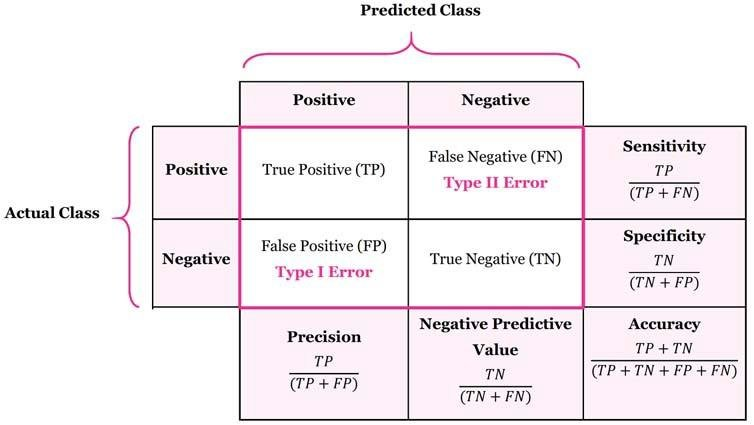

- $Precision~=~\dfrac{TP}{TP + FP}$

- $Recall~=~\dfrac{TP}{TP + FN}$

- $F1-score~=~2*\dfrac{Precision*Recall}{Precision + Recall}$

- **Recall**:  Thể hiện khả năng phát hiện tất cả các postivie, tỷ lệ này càng cao thì cho thấy khả năng bỏ sót các điểm Positive là thấp

- **Precision**: Thể hiện sự chuẩn xác của việc phát hiện các điểm Positive. Số này càng cao thì model nhận các điểm Positive càng chuẩn.

- **F1 score**: Là số dung hòa Recall và Precision giúp ta có căn cứ để lựa chọn model. F1 càng cao càng tốt.

- **Đường ROC** : Thể hiện sự tương quan giữa Precision và Recall khi thay đổi threshold.

- **Area Under the ROC**: Là vùng nằm dưới ROC, vùng này càng lớn thì model càng tốt

In [87]:
def check_condition(var, var_name):
    if not isinstance(var,int):
        print(f"{var_name} must be int")
    elif var <= 0:
        print(f"{var_name} must be greater than zero")
    else:
        return True
    return False

def exercise1(tp, fp, fn):
    checking = check_condition(tp,'tp') + check_condition(fp,'fp') + check_condition(fn,'fn')
    if checking==3:
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1_score = 2*(precision*recall)/(precision+recall)     
        
        print(f"Precision is {precision}")
        print(f"Recall is {recall}")        
        print(f"F1-score is {f1_score}")
    return '====================='

In [88]:
print(exercise1(tp='a', fp=3, fn=4))
print(exercise1(tp=2, fp='a', fn=4))
print(exercise1(tp=2, fp=3, fn='a'))
print(exercise1(tp=2, fp=0, fn=0))
print(exercise1(tp=2, fp=3, fn=4))
print(exercise1(tp=2.1, fp=3, fn=0))

tp must be int
fp must be int
fn must be int
fp must be greater than zero
fn must be greater than zero
Precision is 0.4
Recall is 0.3333333333333333
F1-score is 0.3636363636363636
tp must be int
fn must be greater than zero


### 2. Viết function mô phỏng theo 3 activation function

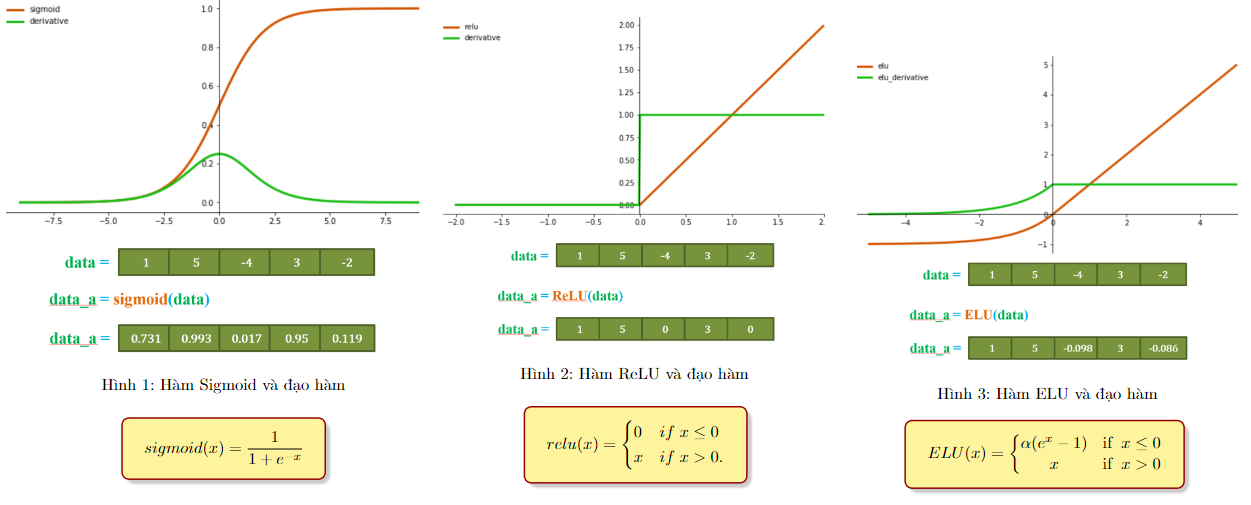

In [82]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))
def relu(x):
    return max(0, x)
def elu(x):
    a = 0.01
    return x if x>0 else a*(math.exp(x)-1)

def is_number(x):
    try:
        float(x)
    except (ValueError):
        return False
    return True

def exercise2():
    x = input("x =")
    print(f"x = {x}")
    if is_number(x):
        activation_function = input("Input activation Function (sigmoid|relu|elu):")
        print(f"Input activation Function (sigmoid|relu|elu): {activation_function}")
        
        case = {
            "sigmoid": sigmoid,
            "relu": relu,
            "elu": elu
        }
        func = case.get(activation_function, 
                        lambda x: f"{activation_function} is not supported")
        result = func(float(x))
        
        return print(f"{activation_function}: f({x}) = {result}")\
              if type(result) is float else print(result)
    else:
        return print("x must be a number")

In [100]:
exercise2()

x = 1.5
Input activation Function (sigmoid|relu|elu): sigmoid
sigmoid: f(1.5) = 0.8175744761936437


In [90]:
exercise2()

x = asd
x must be a number


In [91]:
exercise2()

x = 1.5
Input activation Function (sigmoid|relu|elu): belu
belu is not supported


### 3. Viết function lựa chọn regression loss function để tính loss

- MAE = $ \dfrac{1}{n}∑_{i=1}^{n} |y_{i} - \hat{y}_{i}| $

- MSE = $ \dfrac{1}{n}∑_{i=1}^{n} (y_{i} - \hat{y}_{i})^2 $
- RMSE = $\sqrt{MSE}$ = $ \sqrt{\dfrac{1}{n}∑_{i=1}^{n} (y_{i} - \hat{y}_{i})^2} $


In [152]:
def MAE(y,y_hat):
    return abs(y-y_hat)#/len(y)
def MSE(y,y_hat):
    return (y-y_hat)**2#/len(y)
# def RMSE(y,y_hat):
#     return math.sqrt(MSE(y,y_hat))

In [177]:
import random
def exercise3():
    try:
        n = int(input("Input number of samples (integer number) which are generated: "))
        print(f"Input number of samples (integer number) which are generated: {n}")
    except:
        return print("number of samples must be an integer number")
    loss_name = input("Input loss name: ")
    print(f"Input loss name: {loss_name}")
    
    if loss_name in ['MAE','MSE','RMSE']:
        target = [random.uniform(0, 10) for i in range(n)]
        predict = [random.uniform(0, 10) for i in range(n)]
        # target = [4.5905830130732355, 8.447168720237958, 9.280646891626386, 9.877147335937869, 5.540221923628147]
        # predict = [6.659262156575629, 4.592264312227207, 8.701801828625959, 4.799972972282257, 0.20159822778697878]

        final_loss=0
        for i in range(n):
            if loss_name == 'MAE':
                loss = MAE(target[i], predict[i])
            else:
                loss = MSE(target[i], predict[i])
            final_loss += loss
            print(f"loss name: {loss_name}, sample: {i}, pred: {predict[i]}, target: {target[i]}, loss: {loss}")
        if loss_name=='RMSE':
            return print(f"Final {loss_name}: {math.sqrt(final_loss/n)}")
        else:
            return print(f"Final {loss_name}: {final_loss/n}")
    else:
        return print("This loss name is not supported.")


In [183]:
exercise3()

number of samples must be an integer number


In [180]:
exercise3()

Input number of samples (integer number) which are generated: 5
Input loss name: asd
This loss name is not supported.


In [178]:
exercise3()

Input number of samples (integer number) which are generated: 5
Input loss name: MAE
loss name: MAE, sample: 0, pred: 6.659262156575629, target: 4.5905830130732355, loss: 2.0686791435023935
loss name: MAE, sample: 1, pred: 4.592264312227207, target: 8.447168720237958, loss: 3.854904408010751
loss name: MAE, sample: 2, pred: 8.701801828625959, target: 9.280646891626386, loss: 0.5788450630004274
loss name: MAE, sample: 3, pred: 4.799972972282257, target: 9.877147335937869, loss: 5.077174363655612
loss name: MAE, sample: 4, pred: 0.20159822778697878, target: 5.540221923628147, loss: 5.338623695841168
Final MAE: 3.3836453348020705


In [179]:
exercise3()

Input number of samples (integer number) which are generated: 5
Input loss name: MSE
loss name: MSE, sample: 0, pred: 6.659262156575629, target: 4.5905830130732355, loss: 4.279433398761796
loss name: MSE, sample: 1, pred: 4.592264312227207, target: 8.447168720237958, loss: 14.860287994900718
loss name: MSE, sample: 2, pred: 8.701801828625959, target: 9.280646891626386, loss: 0.3350616069599687
loss name: MSE, sample: 3, pred: 4.799972972282257, target: 9.877147335937869, loss: 25.777699518961764
loss name: MSE, sample: 4, pred: 0.20159822778697878, target: 5.540221923628147, loss: 28.50090296579681
Final MSE: 14.750677097076212


In [175]:
exercise3()

Input number of samples (integer number) which are generated: 5
Input loss name: RMSE
loss name: RMSE, sample: 0, pred: 6.659262156575629, target: 4.5905830130732355, loss: 4.279433398761796
loss name: RMSE, sample: 1, pred: 4.592264312227207, target: 8.447168720237958, loss: 14.860287994900718
loss name: RMSE, sample: 2, pred: 8.701801828625959, target: 9.280646891626386, loss: 0.3350616069599687
loss name: RMSE, sample: 3, pred: 4.799972972282257, target: 9.877147335937869, loss: 25.777699518961764
loss name: RMSE, sample: 4, pred: 0.20159822778697878, target: 5.540221923628147, loss: 28.50090296579681
Final RMSE: 3.8406610234536727


### 4. Viết 4 functions để ước lượng các hàm số sau
- $sin(x) \approx ∑_{n=0}^{\infty}(-1)^n\dfrac{x^{2n+1}}{(2n+1)!} = x-\dfrac{x^3}{3!}+\dfrac{x^5}{5!}-\dfrac{x^7}{7!}+\dfrac{x^9}{9!}-{...}$

- $cos(x) \approx ∑_{n=0}^{\infty}(-1)^n\dfrac{x^{2n}}{(2n)!} = 1-\dfrac{x^2}{2!}+\dfrac{x^4}{4!}-\dfrac{x^6}{6!}+\dfrac{x^8}{8!}-\dfrac{x^{10}}{10!}+{...}$

- $sinh(x) \approx ∑_{n=0}^{\infty}\dfrac{x^{2n+1}}{(2n+1)!} = x+\dfrac{x^3}{3!}+\dfrac{x^5}{5!}+\dfrac{x^7}{7!}+\dfrac{x^9}{9!}+{...}$

- $cosh(x) \approx ∑_{n=0}^{\infty}\dfrac{x^{2n}}{(2n)!} = 1+\dfrac{x^2}{2!}+\dfrac{x^4}{4!}+\dfrac{x^6}{6!}+\dfrac{x^8}{8!}+\dfrac{x^{10}}{10!}+{...}$



In [193]:
def approx_sin(x, n):
    return sum([((-1)**i)*(x**(2*i+1))/math.factorial(2*i+1) for i in range(n)])
def approx_cos(x, n):
    return sum([((-1)**i)*(x**(2*i))/math.factorial(2*i) for i in range(n)])
def approx_sinh(x, n):
    return sum([(x**(2*i+1))/math.factorial(2*i+1) for i in range(n)])
def approx_cosh(x, n):
    return sum([(x**(2*i))/math.factorial(2*i) for i in range(n)])

In [195]:
print(approx_sin(x=3.14, n=10))
print(approx_cos(x=3.14, n=10))
print(approx_sinh(x=3.14, n=10))
print(approx_cosh(x=3.14, n=10))

0.001592652393160744
-0.9999987352210833
11.530292029865986
11.573574824666185


### 5. Viết function thực hiện Mean Difference of $n^{th}$ Root Error
$$
\text{MD\_nRE} = \frac{1}{m} \sum_{i=1}^m \left( \sqrt[n]{y_i} - \sqrt[n]{\hat{y}_i} \right)^p
$$
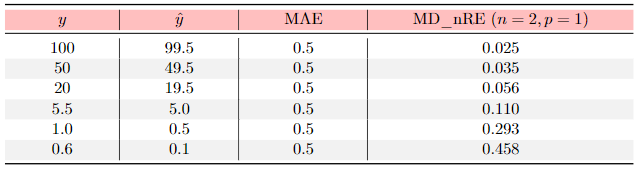

In [199]:
def MD_nRE(y, y_hat, n, p):
    return sum((y**(1/n)-y_hat**(1/n))**(p))/len(y)
def md_nre_single_sample(y, y_hat, n, p):
    return (y**(1/n)-y_hat**(1/n))**(p)

print(md_nre_single_sample(y=100, y_hat =99.5, n=2, p=1))
print(md_nre_single_sample(y=50, y_hat =49.5, n=2, p=1))
print(md_nre_single_sample(y=20, y_hat =19.5, n=2, p=1))
print(md_nre_single_sample(y=0.6, y_hat =0.1, n=2, p=1))

0.025031328369998107
0.03544417213033135
0.05625552183565574
0.45836890322464546


## II. Câu hỏi trắc nghiệm

### Câu hỏi 1:
Viết function thực hiện đánh giá classification model bằng F1-Score.

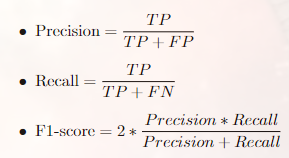

Đầu ra của chương trình sau đây là gì?

In [1]:
def calc_f1_score(tp , fp, fn):
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    return 2*(precision*recall)/(precision+recall)
print(round(calc_f1_score(tp=2, fp=4, fn=5), 2))

0.31


### Câu hỏi 2:
Viết function is_number nhận input có thể là string hoặc một số kiểm tra n (một số) có hợp lệ hay không 
(vd: n='10', is_number(n) sẽ trả về True ngược lại là False). 

Đầu ra của chương trình sau đây là gì?

In [2]:
import math
def is_number(x):
    try:
        float(x)
    except (ValueError):
        return False
    return True
print(is_number (1))
print(is_number('n'))

True
False


### Câu hỏi 3 : 
Đoạn code dưới đây đang thực hiện activation function nào?

In [3]:
x = -2.0
if x<=0:
    y = 0.0
else:
    y = x
print(y)

0.0


### Câu hỏi 4 : 
Viết function thực hiện Sigmoid Function

$ f(x) = \dfrac{1}{1 + e−x}$

Nhận input là x và return kết quả tương ứng trong Sigmoid Function.
 
Đầu ra của chương trình sau đây là gì?

In [5]:
import math
def calc_sig(x):
    return 1 / (1 + math.exp(-x))
print(round(calc_sig(2), 2))

0.88


### Câu hỏi 5 :
Viết function thực hiện Elu Function

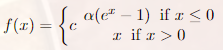

Nhận input là x và return kết quả tương ứng trong Elu Function.

Đầu ra của chương trình sau đây là gì khi 
$α = 0.01$?

In [7]:
import math
def calc_elu(x):
    a = 0.01
    return x if x>0 else a*(math.exp(x)-1)
print(round(calc_elu(-1), 2))

-0.01


### Câu hỏi 6 :
Viết function nhận 2 giá trị $x$, và tên của activation function $\textit{act\_name}$ **activation function chỉ có 3 loại (sigmoid, relu, elu)**, thực hiện tính toán activation function tương ứng với name nhận được trên giá trị của x và trả kết quả.

Đầu ra của chương trình sau đây là gì?

In [8]:
import math
def calc_activation_func(x, act_name):
    if act_name=='sigmoid':
        return 1 / (1 + math.exp(-x))
    elif act_name=='relu':
        return max(0,x)
    elif act_name=='elu':
        a = 0.01
        return x if x>0 else a*(math.exp(x)-1)
    else:
        print("This activation function is not supported!")
print(round(calc_activation_func(x = 3, act_name='sigmoid'), 2))

0.95


### Câu hỏi 7 :
Viết function tính absolute 
$error = |y−ˆy|$
. Nhận input là $y$ và $ˆy$, return về kết quả absolute
error tương ứng.

Đầu ra của chương trình sau đây là gì?

In [10]:
def calc_ae(y, y_hat):
    return abs(y-y_hat)
y = 2
y_hat = 9
print(calc_ae(y, y_hat))

7


### Câu hỏi 8 : 
Viết function tính $squared error = (y−ˆy)2$ . Nhận input là $y$ và $ˆy$, return về kết quả squared error tương ứng.

Đầu ra của chương trình sau đây là gì?

In [13]:
def calc_se(y, y_hat):
    return (y-y_hat)**2
print(calc_se(2, 1))

1


### Câu hỏi 9 :
Dựa vào công thức xấp xỉ $cos$ và điều kiện được giới thiệu. Viết function xấp xỉ $cos$ khi nhận $x$ là giá trị muốn tính ${cos(x)}$ và ${n}$ là số lần lặp muốn xấp xỉ. Return về kết quả ${cos(x)}$ với bậc xấp xỉ tương ứng.

Đầu ra của chương trình sau đây là gì?

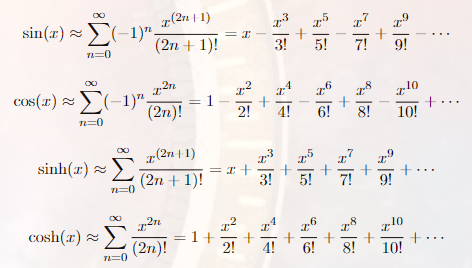

In [15]:
import math
def approx_cos(x, n):
    return sum([((-1)**i)*(x**(2*i))/math.factorial(2*i) for i in range(n)])
assert round(approx_cos(x=1, n=10), 2) ==0.54
print(round(approx_cos(x=3.14, n=10), 2))

-1.0


### Câu hỏi 10 :
Dựa vào công thức xấp xỉ $sin$ và điều kiện được giới thiệu. Viết function xấp xỉ $sin$ khi nhận $x$ là giá trị muốn tính $sin(x)$ và $n$ là số lần lặp muốn xấp xỉ. Return về kết quả $sin(x)$ với bậc xấp xỉ tương ứng.

Đầu ra của chương trình sau đây là gì?

In [16]:
import math
def approx_sin(x, n):
    return sum([((-1)**i)*(x**(2*i+1))/math.factorial(2*i+1) for i in range(n)])
print(round(approx_sin(x=3.14, n=10), 4))

0.0016


### Câu hỏi 11 :
Dựa vào công thức xấp xỉ $sinh$ và điều kiện được giới thiệu. Viết function xấp xỉ $sinh$ khi nhận $x$ là giá trị muốn tính $sinh(x)$ và $n$ là số lần lặp muốn xấp xỉ. Return về
kết quả $sinh(x)$ với bậc xấp xỉ tương ứng.

Đầu ra của chương trình sau đây là gì?

In [18]:
import math
def approx_sinh(x, n):
    return sum([(x**(2*i+1))/math.factorial(2*i+1) for i in range(n)])
print(round(approx_sinh(x=3.14, n=10), 2))

11.53


### Câu hỏi 12 :
Dựa vào công thức xấp xỉ $cosh$ và điều kiện được giới thiệu. Viết function xấp xỉ $cosh$ khi nhận $x$ là giá trị muốn tính $cosh(x)$ và $n$ là số lần lặp muốn xấp xỉ. Return về kết quả $cosh(x)$ với bậc xấp xỉ tương ứng.

Đầu ra của chương trình sau đây là gì?

In [19]:
import math
def approx_cosh(x, n):
    return sum([(x**(2*i))/math.factorial(2*i) for i in range(n)])
print(round(approx_cosh(x=3.14, n=10), 2))

11.57


### Câu hỏi 13 :

$$
\text{MD\_nRE} = \frac{1}{m} \sum_{i=1}^m \left( \sqrt[n]{y_i} - \sqrt[n]{\hat{y}_i} \right)^p,
$$

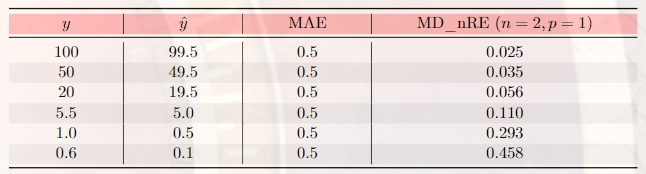

Đoạn code nào thực hiện đúng **Mean Difference of nth Root Error** được miêu tả ở trên?

In [20]:
# (A)
def md_nre_single_sample(y, y_hat , n, p):
    y_root = y ** (1/n)
    y_hat_root = y_hat ** (1/n)
    difference = y_root - y_hat_root
    loss = difference ** p
    return loss

# (B)
def md_nre_single_sample1(y, y_hat , n, p):
    y_root = y ** (1/n)
    y_hat_root = y_hat ** (1/2) #Wrong. Not 1/2 but 1/n
    difference = y_root - y_hat_root
    loss = difference ** p
    return loss

# (C)
def md_nre_single_sample2(y, y_hat , n, p):
    y_root = y ** (1/n)
    y_hat_root = y_hat ** (1/n)
    difference = y_root / y_hat_root #Wrong. Not / but -
    loss = difference ** p
    return loss

# (D)
def md_nre_single_sample3(y, y_hat , n, p):
    y_root = y ** (1/n)
    y_hat_root = y_hat ** (1/n)
    difference = y_root - y_hat_root
    loss = difference #Wrong. Missing **p
    return loss

In [35]:
import numpy as np
y = [100, 50, 20, 5.5, 1.0, 0.6]
y_hat = [99.5, 49.5, 19.5, 5.0, 0.5, 0.1]
expected = np.array([0.025, 0.035, 0.056, 0.110, 0.293, 0.458])
a, b, c, d = [], [], [], []

In [36]:
for i in range(6): 
    a.append(md_nre_single_sample(y[i], y_hat[i] , 2, 1))
    b.append(md_nre_single_sample1(y[i], y_hat[i] , 2, 1))
    c.append(md_nre_single_sample2(y[i], y_hat[i] , 2, 1))
    d.append(md_nre_single_sample3(y[i], y_hat[i] , 2, 1))
print(np.sum(np.array(expected)-np.array(a)))
print(np.sum(np.array(expected)-np.array(b)))
print(np.sum(np.array(expected)-np.array(c)))
print(np.sum(np.array(expected)-np.array(d)))


-0.00013304678600814523
-0.00013304678600814523
-6.955798749903475
-0.00013304678600814523
